In [1]:
import torch
import numpy as np
import os
from datasets import load_dataset
from tqdm import tqdm
from matplotlib import pyplot as plt
os.chdir("../")
os.getcwd()
from sklearn.metrics import classification_report 

/home/lij47/miniconda3/envs/base2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from audiodiffusion import AudioDiffusion

device = "cuda" if torch.cuda.is_available() else "cpu"
generator = torch.Generator(device=device)

model_id = "teticio/audio-diffusion-breaks-256"

audio_diffusion = AudioDiffusion(model_id=model_id)
mel = audio_diffusion.pipe.mel

dataset_train = load_dataset('teticio/audio-diffusion-breaks-256')

unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|██████████| 3/3 [00:00<00:00, 22.01it/s]


In [3]:
def entropy(x):
    _ , counts = np.unique(x, return_counts=True)
    probabilities = counts / x.shape[-1]
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

In [4]:
def top_k_windows(arr, window_size, metric, k, sort_max=True):
    values = []
    for i in range(window_size, arr.shape[-1]-window_size, window_size*3):
        window = arr[i:i+window_size]
        values.append((metric(window), i))
    sorted_list = sorted(values, key=lambda x: x[0], reverse=sort_max)
    return sorted_list[:k]

In [5]:
train_entropy_norm_list= torch.load('norm_data/train_entropy_norm_list.pt')
non_train_entropy_norm_list= torch.load('norm_data/non_train_entropy_norm_list.pt')

In [6]:
print(sorted(train_entropy_norm_list)[:20])
print(sorted(non_train_entropy_norm_list)[:20])

[3.887148925933181, 5.412832992544756, 6.177051842825475, 8.436978412448868, 9.941956662683566, 10.598379583914047, 11.18590714800853, 11.308686945589983, 11.327149918504466, 12.244727429547867, 13.156106574675613, 14.276083785918015, 14.343985231453368, 14.590870362753247, 14.696392296242717, 15.701661113857217, 15.707032784677391, 15.727009235162146, 38.46284023116878, 42.60364844294823]
[14.84948833493325, 88.21381643469753, 101.56864393767682, 109.08809767646251, 111.77297576965948, 125.49765917961054, 125.56801547843699, 133.1318117580981, 140.47441761522583, 141.4519821358577, 142.0886382698082, 142.6248684747231, 142.6252040318804, 143.4572764939372, 143.5357514528875, 143.58378385087832, 143.69953994859202, 143.81142465244918, 144.19449440487392, 144.36781698480362]


In [7]:
train_dynamic_range_norm_list= torch.load('norm_data/train_dynamic_range_norm_list.pt')
non_train_dynamic_range_norm_list= torch.load('norm_data/non_train_dynamic_range_norm_list.pt')

In [8]:
print(sorted(train_dynamic_range_norm_list)[:20])
print(sorted(non_train_dynamic_range_norm_list)[:20])

[134.7059148966918, 141.27109399514296, 141.8756713398976, 142.44201311775066, 143.24407731162233, 143.28979929868296, 143.37941346706927, 143.3922705331994, 143.44296561564636, 143.76648686964919, 143.85469788084333, 143.9295705209916, 144.05450964026392, 144.1132897399533, 144.13071964131396, 144.2188322126039, 144.23190833909877, 144.34584763615393, 144.3923684982944, 144.40938625002894]
[139.46627239764342, 141.11187308492134, 141.44648094290633, 141.7354956745948, 142.19289363151134, 142.24125882626137, 142.37270309783327, 142.53137281997655, 142.67265862015188, 142.82391400958403, 142.98415264991704, 143.1109896055706, 143.2839438871951, 143.31301904360197, 143.41898027382035, 143.52531927893568, 143.66687388699768, 143.70012138028324, 143.8037193250813, 143.91569616153876]


In [9]:
train_variance_norm_list= torch.load('norm_data/train_variance_norm_list.pt')
non_train_variance_norm_list= torch.load('norm_data/non_train_variance_norm_list.pt')

In [10]:
print(sorted(train_variance_norm_list)[:20])
print(sorted(non_train_variance_norm_list)[:20])

[136.04168066477732, 140.5771045219322, 140.7361686870621, 141.34584184292962, 141.905307495134, 142.32487942221945, 142.39063020094576, 142.7882917751711, 143.0086080748137, 143.10286708005168, 143.1088024658062, 143.39656700707076, 143.6271346794859, 143.62754643928247, 143.76403984129684, 143.77521442842038, 143.82540798139092, 143.84809587194394, 143.87032682028183, 143.88414679062896]
[139.97881872150816, 140.9981727569906, 141.12470021159675, 141.8451469709003, 142.29852869049233, 142.39065903853634, 142.42360893317186, 142.48409084397287, 142.49762684529637, 142.56532883332284, 142.94594789062845, 143.0894508238626, 143.17522011240135, 143.23285390089703, 143.4595098602796, 143.46426461117892, 143.5238118672736, 143.5657192165332, 143.56985172928847, 143.57085355656218]


In [11]:
train_random_norm_list= torch.load('norm_data/train_random_norm_list.pt')
non_train_random_norm_list= torch.load('norm_data/non_train_random_norm_list.pt')

In [12]:
print(sorted(train_random_norm_list)[:20])
print(sorted(non_train_random_norm_list)[:20])

[81.81961918271415, 91.92185692882916, 94.21615839056615, 94.8287648943616, 99.62977454109762, 105.07322824614948, 115.47364880001696, 118.36991732106563, 120.15138126978714, 120.51753238054228, 120.73196093580233, 124.9469192796183, 124.94819539689806, 125.21834443182745, 127.73022290543534, 128.46420809734673, 129.3927293719268, 130.67231337271392, 130.815071446962, 131.4552839766796]
[104.92767677503711, 110.95862684645299, 111.54176712894619, 122.05285245727865, 128.66782765097955, 129.3763377579321, 137.7404542339994, 138.56841044053547, 139.27452644330248, 139.6967767749649, 140.4410181597243, 140.5519781851642, 140.69784618459477, 140.9437278189736, 140.97665561179736, 140.9808433913784, 141.0210568955323, 141.0539864005537, 141.08249804764827, 141.5825644358466]


In [13]:
train_entropy_norm_min_list= torch.load('norm_data_min/train_entropy_norm_list.pt')
non_train_entropy_norm_min_list= torch.load('norm_data_min/non_train_entropy_norm_list.pt')

In [14]:
print(sorted(train_entropy_norm_min_list)[:20])
print(sorted(non_train_entropy_norm_min_list)[:20])

[4.4319284006893955, 8.605394165985812, 8.662001415997548, 9.185156268154758, 10.615308296861112, 11.09007751213457, 11.101592958500062, 11.808698780629204, 12.266120924324133, 12.964766266806517, 13.41438596988416, 13.529056711332482, 14.021584781681607, 15.01279910057437, 15.276484878597085, 15.605254961489038, 15.915852315797423, 36.15689937133706, 45.83551444016514, 46.628564787886106]
[12.4291640194939, 88.11753651507581, 101.12854374198159, 107.11813052592679, 110.29947279571793, 123.62842460258764, 125.06473005804637, 131.99838964297197, 136.30851439407078, 136.9756575184793, 140.11100009338037, 142.5266837852617, 142.81910994515238, 143.34897630867437, 143.38543421449202, 143.94840541431614, 143.958227090863, 143.96378195803157, 144.02953233203223, 144.09099708341446]


In [15]:
train_dynamic_range_norm_min_list= torch.load('norm_data_min/train_dynamic_range_norm_list.pt')
non_train_dynamic_range_norm_min_list= torch.load('norm_data_min/non_train_dynamic_range_norm_list.pt')

In [16]:
print(sorted(train_dynamic_range_norm_min_list)[:20])
print(sorted(non_train_dynamic_range_norm_min_list)[:20])

[4.285871733125694, 5.957617907936887, 6.6976033711529865, 8.985444985195892, 9.826578616452757, 10.742060899488887, 11.177823415963486, 11.385803034292778, 13.75379598855289, 13.826423755589905, 13.841106478517824, 14.079794943921831, 14.242860644947012, 14.711039913122239, 15.361448204338007, 16.935883781457804, 17.62152264952182, 29.529140941721586, 35.80707308783862, 36.510655483103264]
[14.467092490644891, 15.261123780808754, 25.61692425199247, 28.13218010137582, 51.43994239050153, 74.77066327607619, 75.63770604141689, 79.63202795417078, 96.3761693371529, 102.86433450599456, 104.07533909762928, 104.59569367076031, 112.7367093898436, 116.07460051657888, 117.58841214082607, 119.49258801657035, 119.89448239857174, 121.47949805469571, 127.35805123433438, 128.17444734985025]


In [17]:
train_variance_norm_min_list= torch.load('norm_data_min/train_variance_norm_list.pt')
non_train_variance_norm_min_list= torch.load('norm_data_min/non_train_variance_norm_list.pt')

In [18]:
print(sorted(train_variance_norm_min_list)[:20])
print(sorted(non_train_variance_norm_min_list)[:20])

[4.165691265994918, 6.240858017184817, 7.276590440755436, 9.660252126870885, 9.66700955524232, 10.562595726231432, 11.08994377052029, 12.36632887292327, 13.288049590533063, 13.520944474521846, 13.600930770610143, 14.496157165807436, 16.154331915984866, 16.235995627253292, 16.236830926435346, 16.355914004145735, 16.516774683779524, 29.691064911610056, 36.488899690421334, 37.10912835039537]
[10.45794378404059, 12.831754836408953, 16.776066656937612, 29.398815534645003, 63.28359319739824, 72.78640878193836, 74.61960110912514, 75.835705596724, 96.62298498875266, 102.51438192441258, 105.78398373686414, 105.7883271211646, 113.58183509516775, 116.19347639205493, 120.47475942984508, 121.3955189119501, 121.81490648488129, 122.38308486523708, 123.84316275675675, 127.23115543369673]


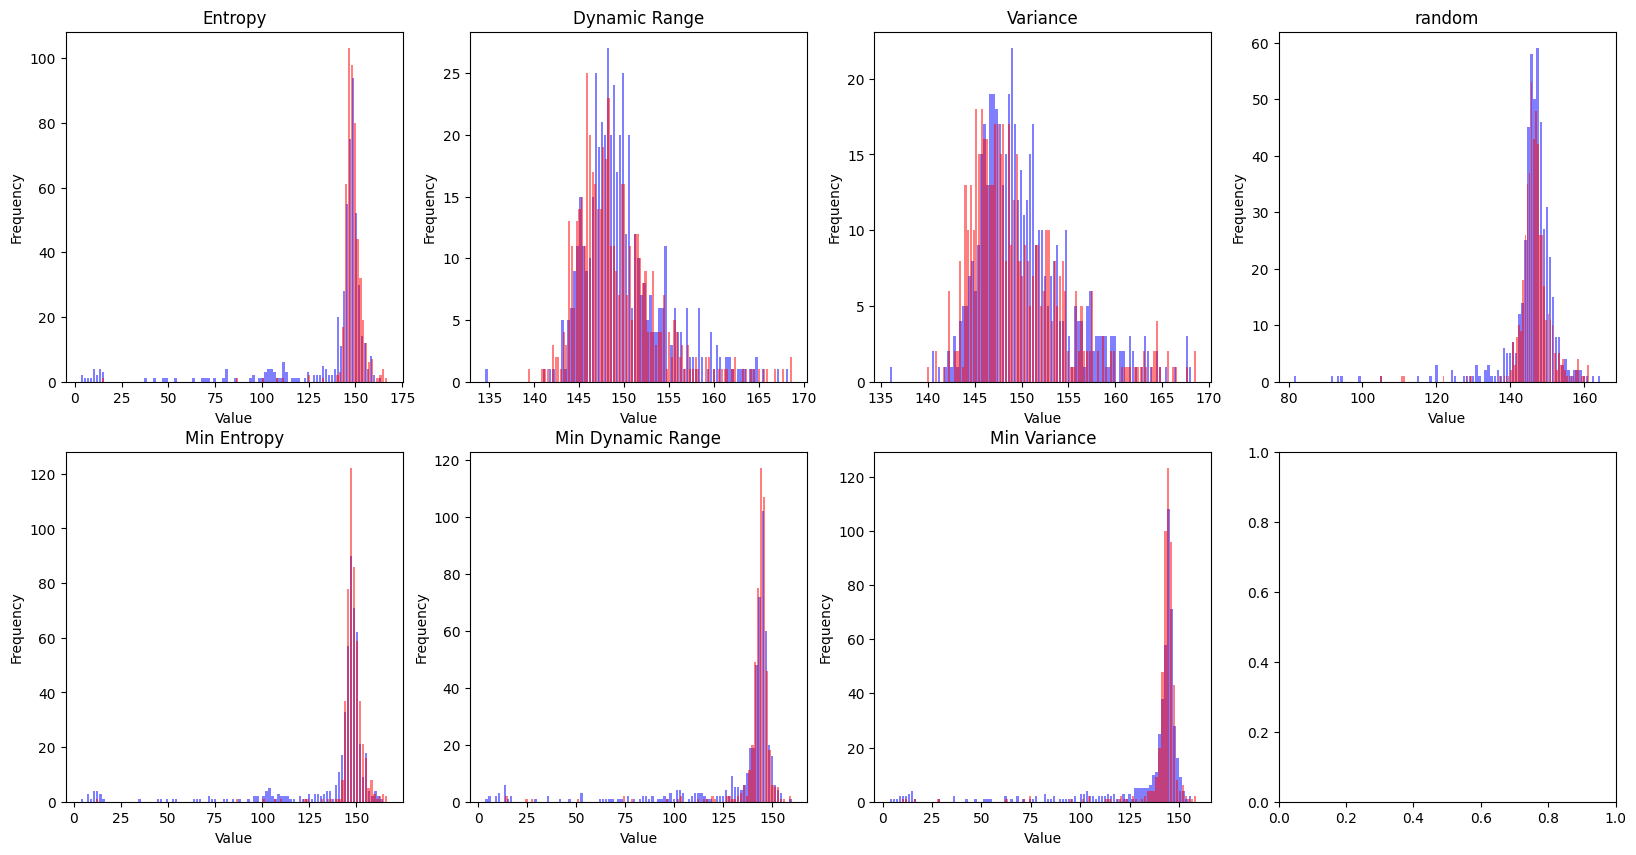

In [19]:
# plt.figure(figsize=(5, 40))
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs[0,0].hist(train_entropy_norm_list, bins=100, align='left', rwidth=0.8, color="Blue", alpha=0.5)
axs[0,0].hist(non_train_entropy_norm_list, bins=100, align='left', rwidth=0.8, color="Red", alpha=0.5)

axs[0,0].set_xlabel('Value')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title('Entropy')

axs[0,1].hist(train_dynamic_range_norm_list, bins=100, align='left', rwidth=0.8, color="Blue", alpha=0.5)
axs[0,1].hist(non_train_dynamic_range_norm_list, bins=100, align='left', rwidth=0.8, color="Red", alpha=0.5)

axs[0,1].set_xlabel('Value')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title('Dynamic Range')

axs[0,2].hist(train_variance_norm_list, bins=100, align='left', rwidth=0.8, color="Blue", alpha=0.5)
axs[0,2].hist(non_train_variance_norm_list, bins=100, align='left', rwidth=0.8, color="Red", alpha=0.5)

axs[0,2].set_xlabel('Value')
axs[0,2].set_ylabel('Frequency')
axs[0,2].set_title('Variance')

axs[0,3].hist(train_random_norm_list, bins=100, align='left', rwidth=0.8, color="Blue", alpha=0.5)
axs[0,3].hist(non_train_random_norm_list, bins=100, align='left', rwidth=0.8, color="Red", alpha=0.5)

axs[0,3].set_xlabel('Value')
axs[0,3].set_ylabel('Frequency')
axs[0,3].set_title('random')

axs[1,0].hist(train_entropy_norm_min_list, bins=100, align='left', rwidth=0.8, color="Blue", alpha=0.5)
axs[1,0].hist(non_train_entropy_norm_min_list, bins=100, align='left', rwidth=0.8, color="Red", alpha=0.5)

axs[1,0].set_xlabel('Value')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_title('Min Entropy')

axs[1,1].hist(train_dynamic_range_norm_min_list, bins=100, align='left', rwidth=0.8, color="Blue", alpha=0.5)
axs[1,1].hist(non_train_dynamic_range_norm_min_list, bins=100, align='left', rwidth=0.8, color="Red", alpha=0.5)

axs[1,1].set_xlabel('Value')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_title('Min Dynamic Range')

axs[1,2].hist(train_variance_norm_min_list, bins=100, align='left', rwidth=0.8, color="Blue", alpha=0.5)
axs[1,2].hist(non_train_variance_norm_min_list, bins=100, align='left', rwidth=0.8, color="Red", alpha=0.5)

axs[1,2].set_xlabel('Value')
axs[1,2].set_ylabel('Frequency')
axs[1,2].set_title('Min Variance')
plt.savefig('norm_data_hist.png')

In [20]:
def thresholded_values(train_list, non_train_list, threshold):
    train_list = [1 if x <= threshold else 0 for x in train_list]
    non_train_list = [1 if x <= threshold else 0 for x in non_train_list]
    return train_list + non_train_list 

In [40]:
threshold = 125

In [41]:
thresholded_entropy = thresholded_values(train_entropy_norm_list, non_train_entropy_norm_list, threshold)
thresholded_dynamic_range = thresholded_values(train_dynamic_range_norm_list, non_train_dynamic_range_norm_list, threshold)
thresholded_variance = thresholded_values(train_variance_norm_list, non_train_variance_norm_list, threshold)
thresholded_random = thresholded_values(train_random_norm_list, non_train_random_norm_list, threshold)
thresholded_entropy_min = thresholded_values(train_entropy_norm_min_list, non_train_entropy_norm_min_list, threshold)
thresholded_dynamic_range_min = thresholded_values(train_dynamic_range_norm_min_list, non_train_dynamic_range_norm_min_list, threshold)
thresholded_variance_min = thresholded_values(train_variance_norm_min_list, non_train_variance_norm_min_list, threshold)
ground_truth = ([1]*len(train_entropy_norm_list)) + ([0]*len(non_train_entropy_norm_list))

In [42]:
print("Entropy")
print(classification_report(ground_truth, thresholded_entropy))
print("Dynamic Range")
print(classification_report(ground_truth, thresholded_dynamic_range))
print("Variance Range")
print(classification_report(ground_truth, thresholded_variance))
print("Min Entropy")
print(classification_report(ground_truth, thresholded_entropy_min))
print("Min Dynamic Range")
print(classification_report(ground_truth, thresholded_dynamic_range_min))
print("Min Variance Range")
print(classification_report(ground_truth, thresholded_variance_min))
print("Random")
print(classification_report(ground_truth, thresholded_random))

Entropy
              precision    recall  f1-score   support

           0       0.53      0.99      0.69       500
           1       0.93      0.14      0.24       500

    accuracy                           0.56      1000
   macro avg       0.73      0.56      0.47      1000
weighted avg       0.73      0.56      0.47      1000

Dynamic Range
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000

Variance Range
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50    